In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
#from pyclustree import clustree
import matplotlib.pyplot as plt
from sklearn_ann.kneighbors.annoy import AnnoyTransformer


In [3]:
adata = sc.read_h5ad('/mnt/storage/Daniele/atlases/human/Human_Atlas_Harmonised_Core.h5ad')

In [4]:
adata.obs['mask_level_4'] = adata.obs['Level_4'].replace({k: v for v, k in enumerate(adata.obs['Level_4'].unique())})


# import cell types and markers

In [7]:
import json 
with open('../../../supplementary_data/human/annotation_markers.json', 'r') as f:
    celltype_dict = json.load(f)

# Plots func

In [9]:
def plot_macro_celltype_umap(adata, celltype_dict, macro_type, vmax=1):
    """
    Generate UMAP and dotplot for a macro cell group.

    Parameters:
    - adata: AnnData object
    - celltype_dict: dictionary structured by macro cell types
    - macro_type: string key for the macro cell type group to process
    """
    
    # precheck
    if macro_type not in celltype_dict:
        print(f"Error: '{macro_type}' not found in the provided dictionary.")
        return
    celltypes = celltype_dict[macro_type]["celltypes"]
    markers_dict = celltype_dict[macro_type]["markers"]
    valid_celltypes = [ct for ct in celltypes if ct in adata.obs['Level_4'].unique()]
    if not valid_celltypes:
        print(f"Warning: None of the cell types in '{macro_type}' are present in adata.obs['Level_4'].")
        return
    grouped_markers = {
        str(adata.obs['mask_level_4'][adata.obs['Level_4'] == subtype].unique()[0]): markers_dict[subtype]
        for subtype in valid_celltypes
        if markers_dict.get(subtype)
    }
    

    adata_subset = adata[adata.obs['Level_4'].isin(valid_celltypes)].copy()
    group_order = sorted(
        adata_subset.obs['mask_level_4'].unique(),
    )
    group_order_str = [str(g) for g in group_order]
    grouped_markers= {k: grouped_markers[k] for k in group_order_str if k in grouped_markers}
    
    # printing information
    print('=' * 50)
    print(f'Number of cells in {macro_type}: {adata_subset.n_obs}')
    print('=' * 50)
    print(f'Available cell types for {macro_type}:')
    for cell in celltypes:
        print(cell)
    print('=' * 50)
    
    # compute embeddings and plot umap

    sc.pp.neighbors(adata_subset, use_rep='scanvi_L4_emb', transformer=AnnoyTransformer(15))
    sc.tl.umap(adata_subset, min_dist=0.25)
    sc.pl.umap(adata_subset, color='mask_level_4', title="")

    print('=' * 50)
    
    # plot expression of markers
    size_x = max(6, int(4 * sum(len(v) for v in grouped_markers.values()) / 4))
    size_y = max(4, int(4 * len(grouped_markers) / 6))
    fig, ax = plt.subplots(1,2, figsize=(size_x, size_y))




    # Matrixplot
    sc.pl.matrixplot(
        adata_subset, var_names=grouped_markers, groupby='mask_level_4',
        layer='log_norm', show=False, ax=ax[0], categories_order=group_order, cmap = 'Blues', vmax=vmax   
    )

    # Stacked violin
    sc.pl.stacked_violin(
        adata_subset, var_names=grouped_markers, groupby='mask_level_4',
        layer='log_norm', show=False, ax=ax[1], categories_order=group_order, cmap = 'Blues', vmax=vmax
    )

    # Adjust and show
    plt.tight_layout()
    plt.show()


# Immune cells

## CD4 T cells

Number of cells in CD4 T cells: 31896
Available cell types for CD4 T cells:
CD4+ Memory T Cell
CD4+ Th1 Cell
CD4+ Th2 Cell
CD4+ Th17 Cell
CD4+ Th22 Cell
CD4+ Naive T Cell


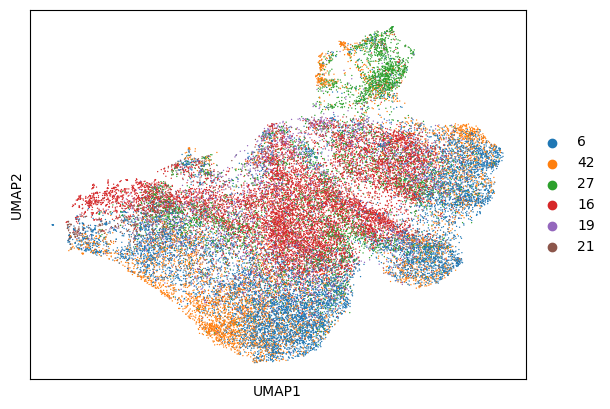

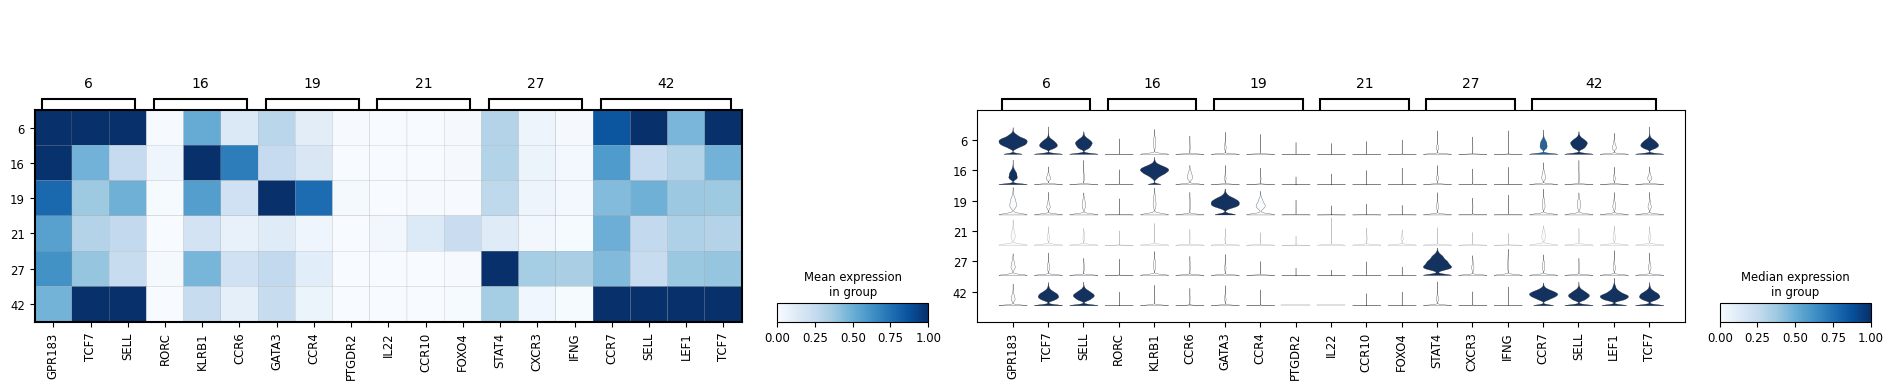

In [10]:
plot_macro_celltype_umap(adata, celltype_dict, 'CD4 T cells')

## CD8 T cells

Number of cells in CD8 T cells: 87391
Available cell types for CD8 T cells:
CD8+ Tissue-Resident Memory T Cell
CD8+ Terminal Effector T Cell
CD8+ Memory T Cell
CD8+ Exhausted T Cell
CD8+ Effector T Cell
CD8+ Naive T Cell


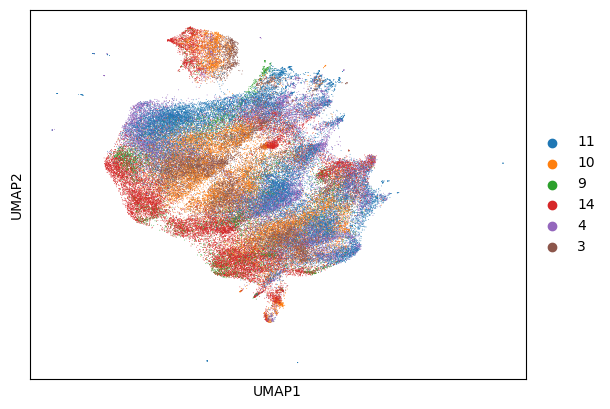

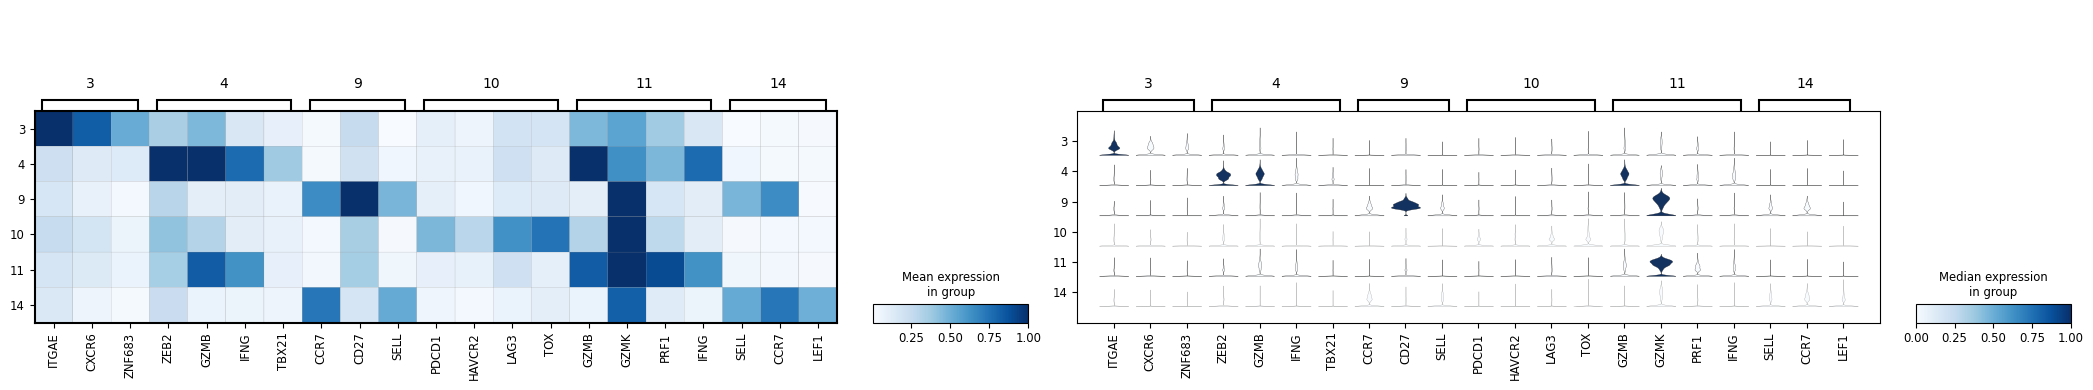

In [11]:
plot_macro_celltype_umap(adata, celltype_dict, 'CD8 T cells')

## Other T cells

Number of cells in Other T cells: 24357
Available cell types for Other T cells:
T-reg
γδ T Cell (Vδ1)
Double Positive CD4+CD8+ T Cell
NK Cell


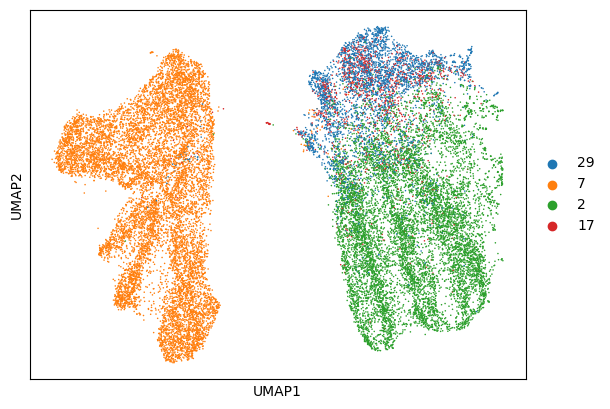

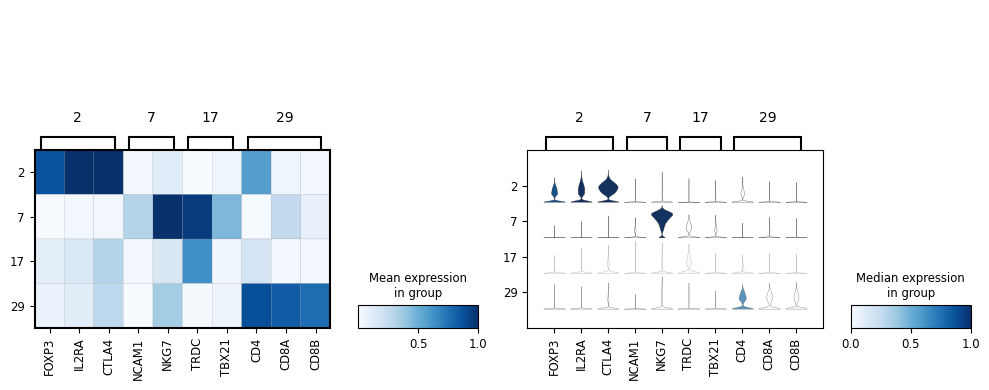

In [12]:
plot_macro_celltype_umap(adata, celltype_dict, 'Other T cells')

## B and plasma cells

Number of cells in B cells and Plasma cells: 31344
Available cell types for B cells and Plasma cells:
B Cell - Naive
B Cell - Memory
B Cell - Activated
B Cell - Germinal Center
B-reg
Plasmablast
Plasma Cell


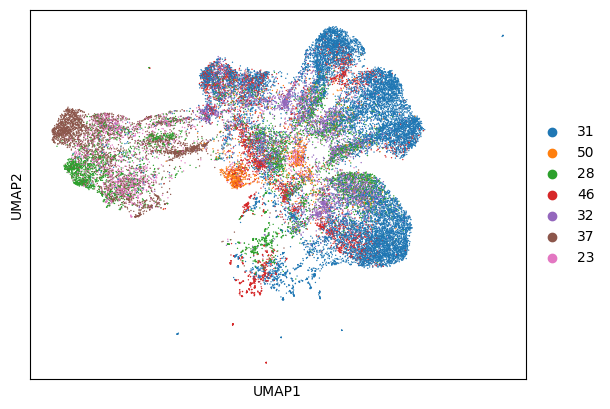

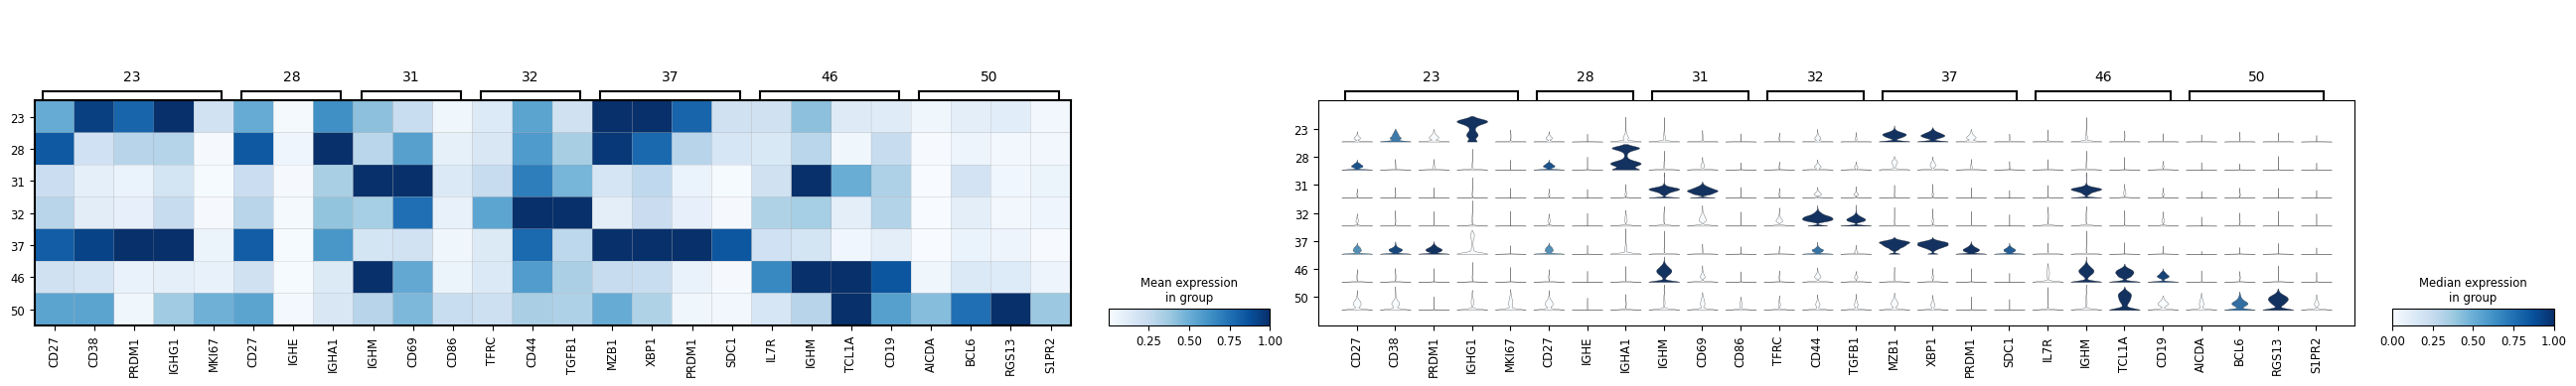

In [13]:
plot_macro_celltype_umap(adata, celltype_dict, 'B cells and Plasma cells')

## Macrophages and Monocytes

Number of cells in Macrophages and Monocytes: 61550
Available cell types for Macrophages and Monocytes:
Monocyte
Macrophage - C1Q+ TAM
Macrophage - CD74+ antigen processing TAM
Macrophage - angiogenic TAM
Macrophage - lipid processing TAM
Macrophage - CD3+ TAM


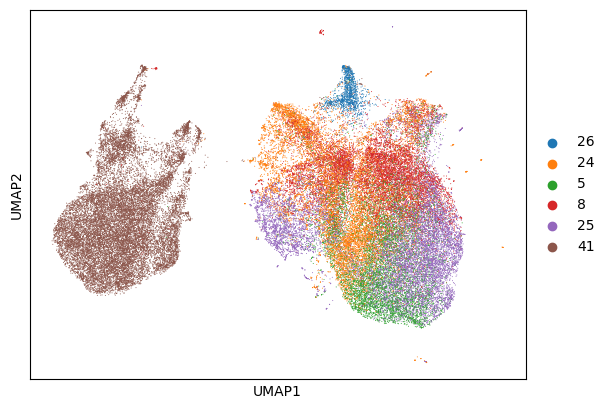

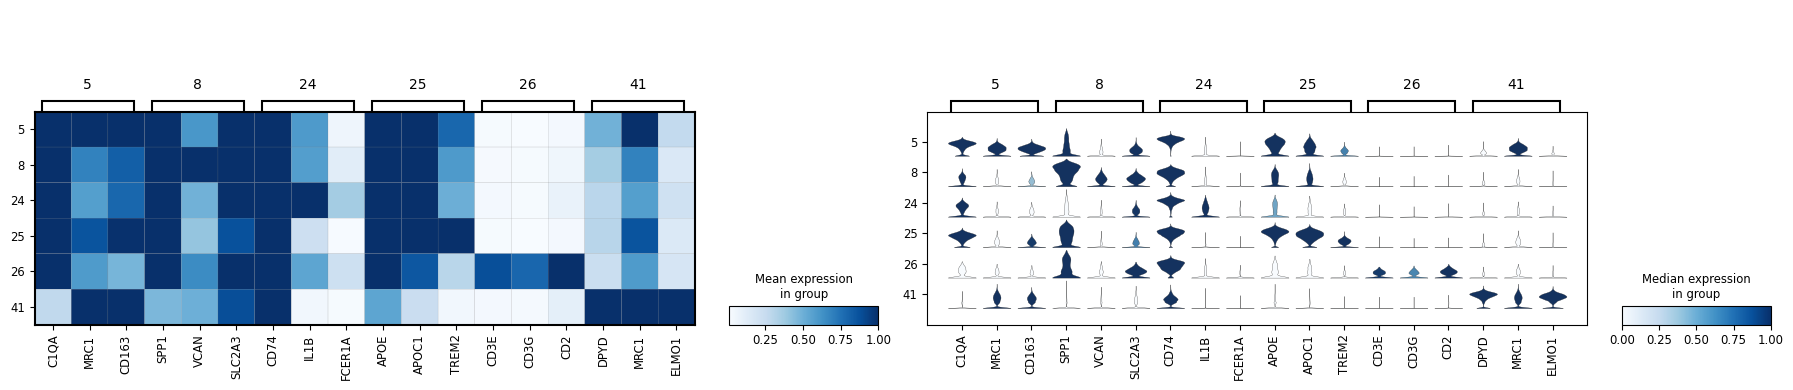

In [14]:
plot_macro_celltype_umap(adata, celltype_dict, 'Macrophages and Monocytes')

## Neutrophils

Number of cells in Neutrophils: 20136
Available cell types for Neutrophils:
Neutrophil - N0
Neutrophil - N1
Neutrophil - N2


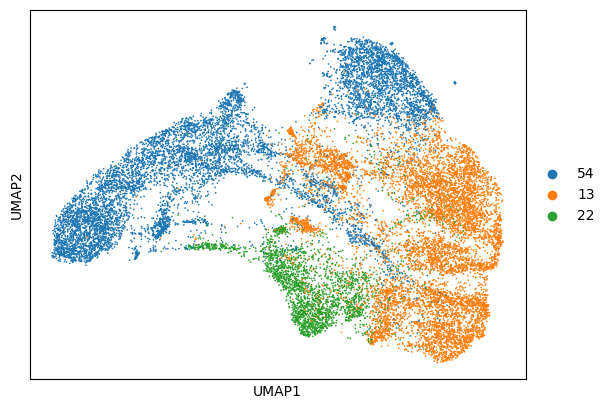

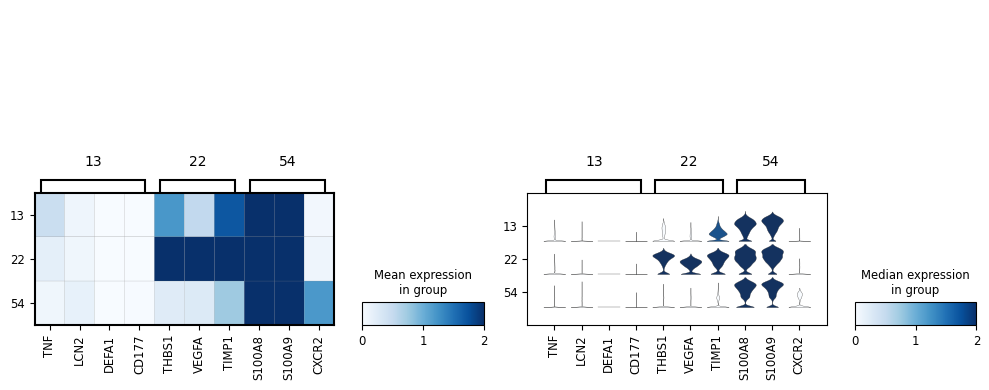

In [15]:
plot_macro_celltype_umap(adata, celltype_dict, 'Neutrophils', 2)

## Dendritic and Mast Cells

Number of cells in Dendritic and Mast Cells: 19352
Available cell types for Dendritic and Mast Cells:
Dendritic Cell - cDC1
Dendritic Cell - cDC2
Dendritic Cell - pDC
Dendritic Cell - Activated
Mast Cell


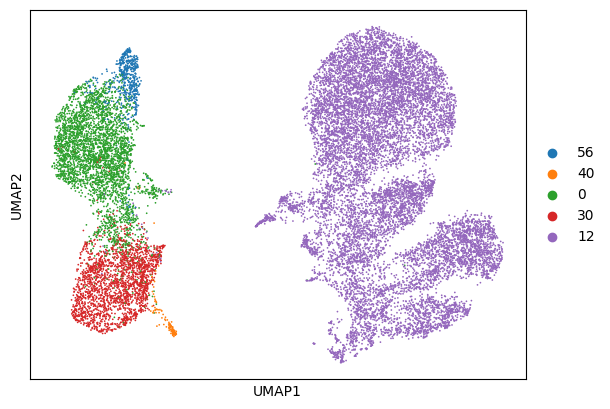

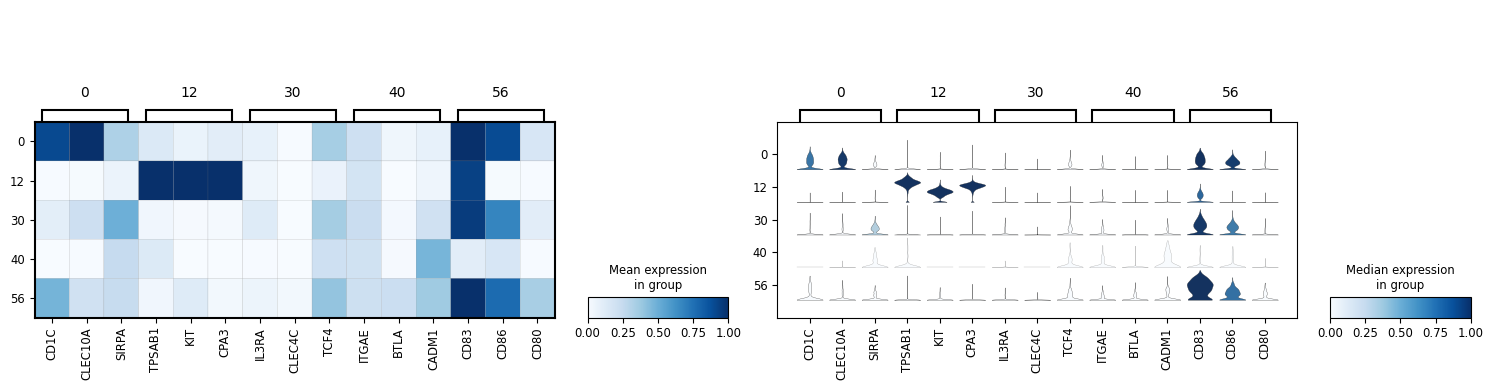

In [16]:
plot_macro_celltype_umap(adata, celltype_dict, 'Dendritic and Mast Cells', 1)

# Malignant cells

Number of cells in Malignant Cells: 284086
Available cell types for Malignant Cells:
Malignant Cell - Epithelial
Malignant Cell - Mesenchymal
Malignant Cell - EMT
Malignant Cell - Hypoxia
Malignant Cell - Senescence
Malignant Cell - Apoptotic
Malignant Cell - Acinar-like
Malignant Cell - Pit Like
Malignant Cell - Highly Proliferative
Malignant Cell - Highly Invasive


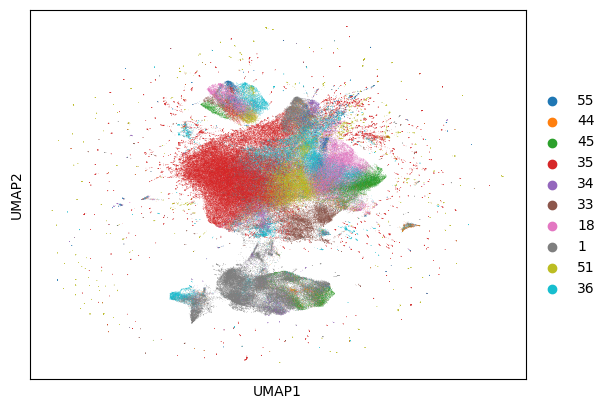

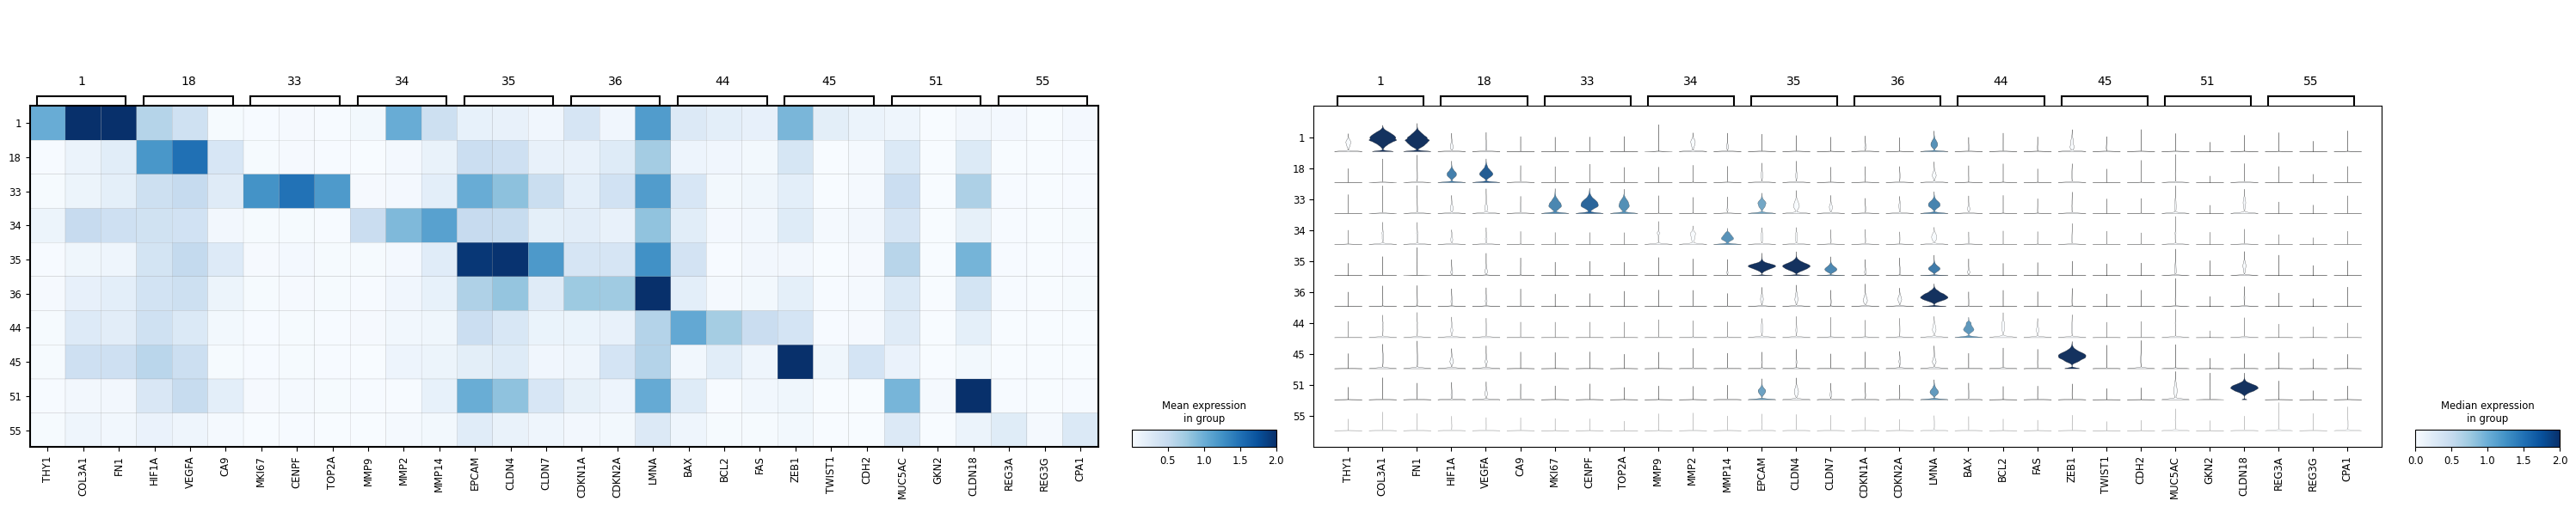

In [17]:
plot_macro_celltype_umap(adata, celltype_dict, 'Malignant Cells', 2)

# Other macro cell types

## Endothelial cells

Number of cells in Endothelial Cells: 41104
Available cell types for Endothelial Cells:
Vascular Endothelial Cell
Lymphatic Endothelial Cell
Tumor-Associated Endothelial Cell


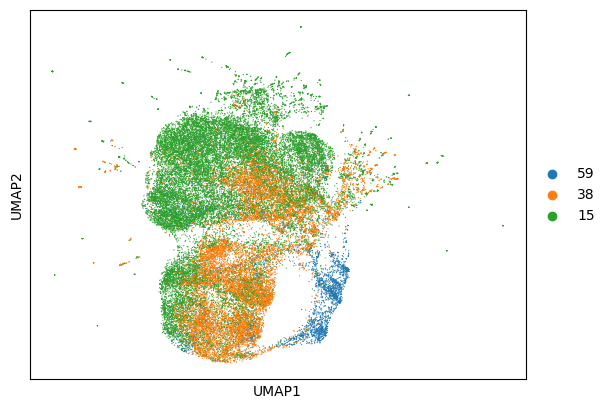

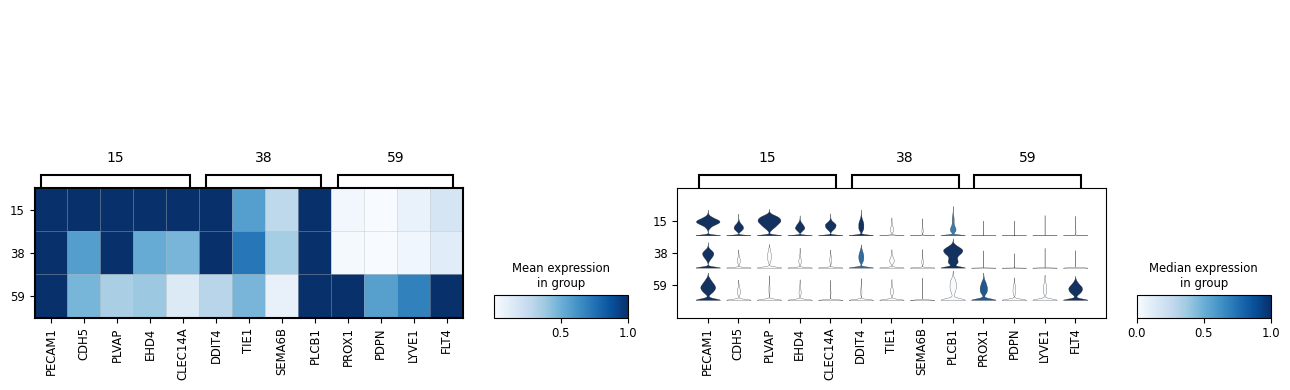

In [18]:
plot_macro_celltype_umap(adata, celltype_dict, 'Endothelial Cells')

## Endocrine cells

Number of cells in Endocrine Cells: 18221
Available cell types for Endocrine Cells:
Alpha Cell
Beta Cell
Other Endocrine


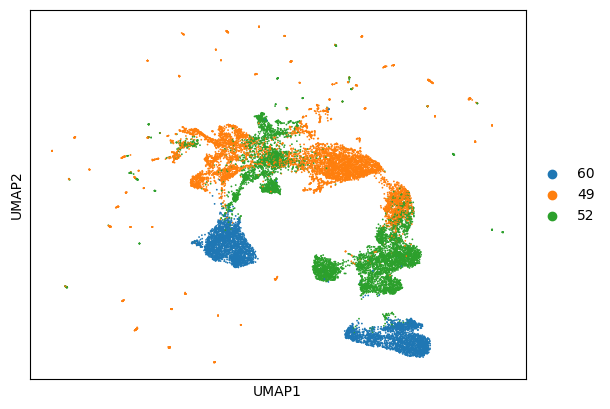

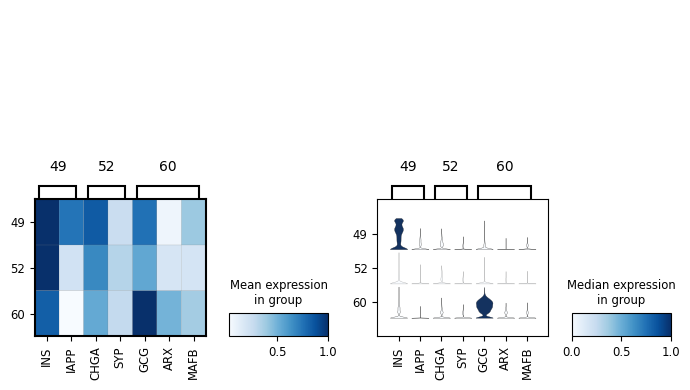

In [19]:
plot_macro_celltype_umap(adata, celltype_dict, 'Endocrine Cells')

## Exocrine cells

Number of cells in Exocrine Cells: 82462
Available cell types for Exocrine Cells:
Acinar Cell
Acinar (REG+) Cell
Acinar Idling Cell
Ductal Cell
Ductal Cell (atypical)


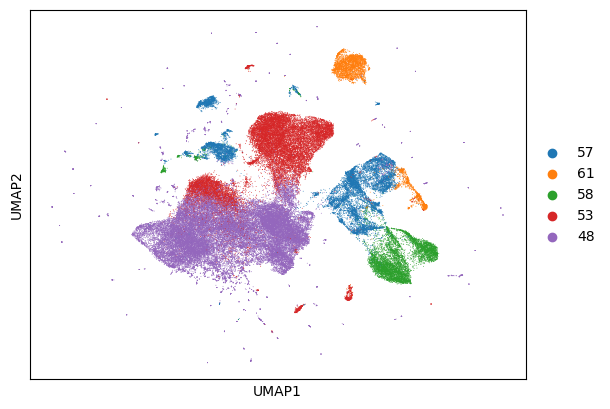

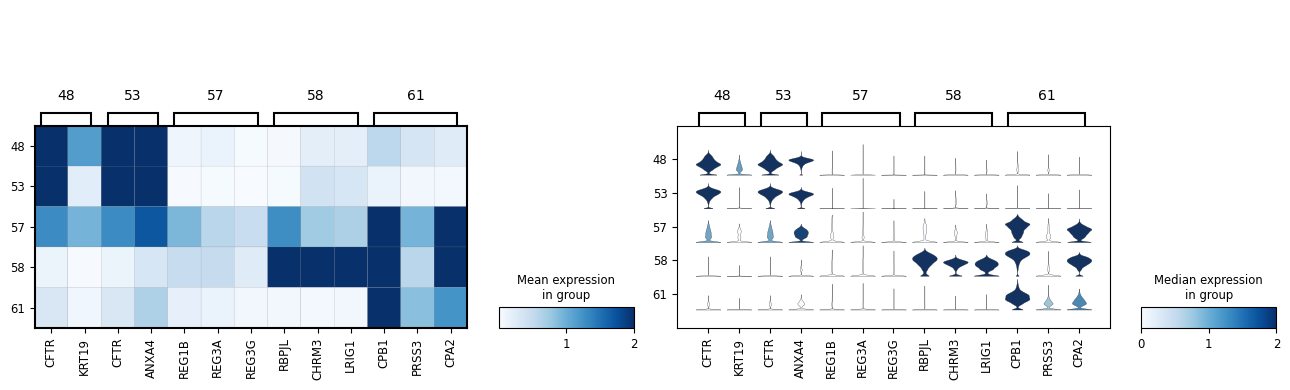

In [20]:
plot_macro_celltype_umap(adata, celltype_dict, 'Exocrine Cells', 2)

## Fibroblasts

Number of cells in Fibroblasts: 80972
Available cell types for Fibroblasts:
iCAF
myCAF


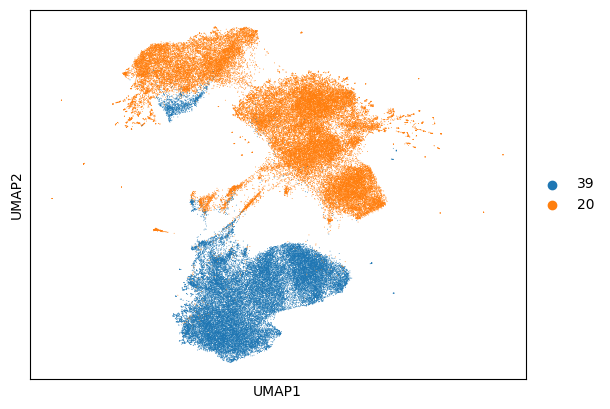

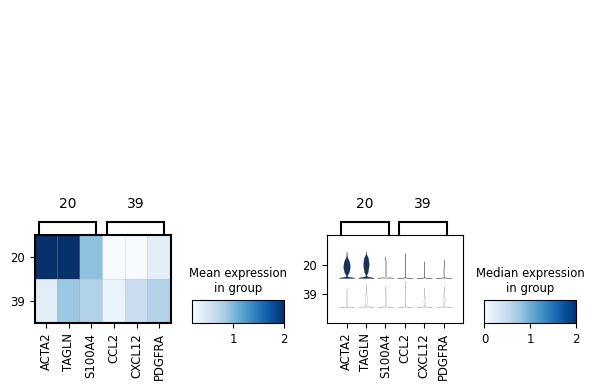

In [21]:
plot_macro_celltype_umap(adata, celltype_dict, 'Fibroblasts', 2)